In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

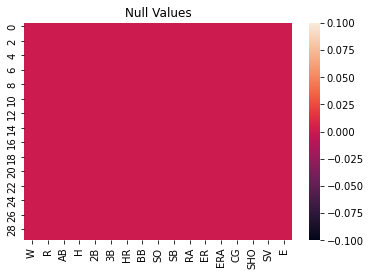

In [7]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

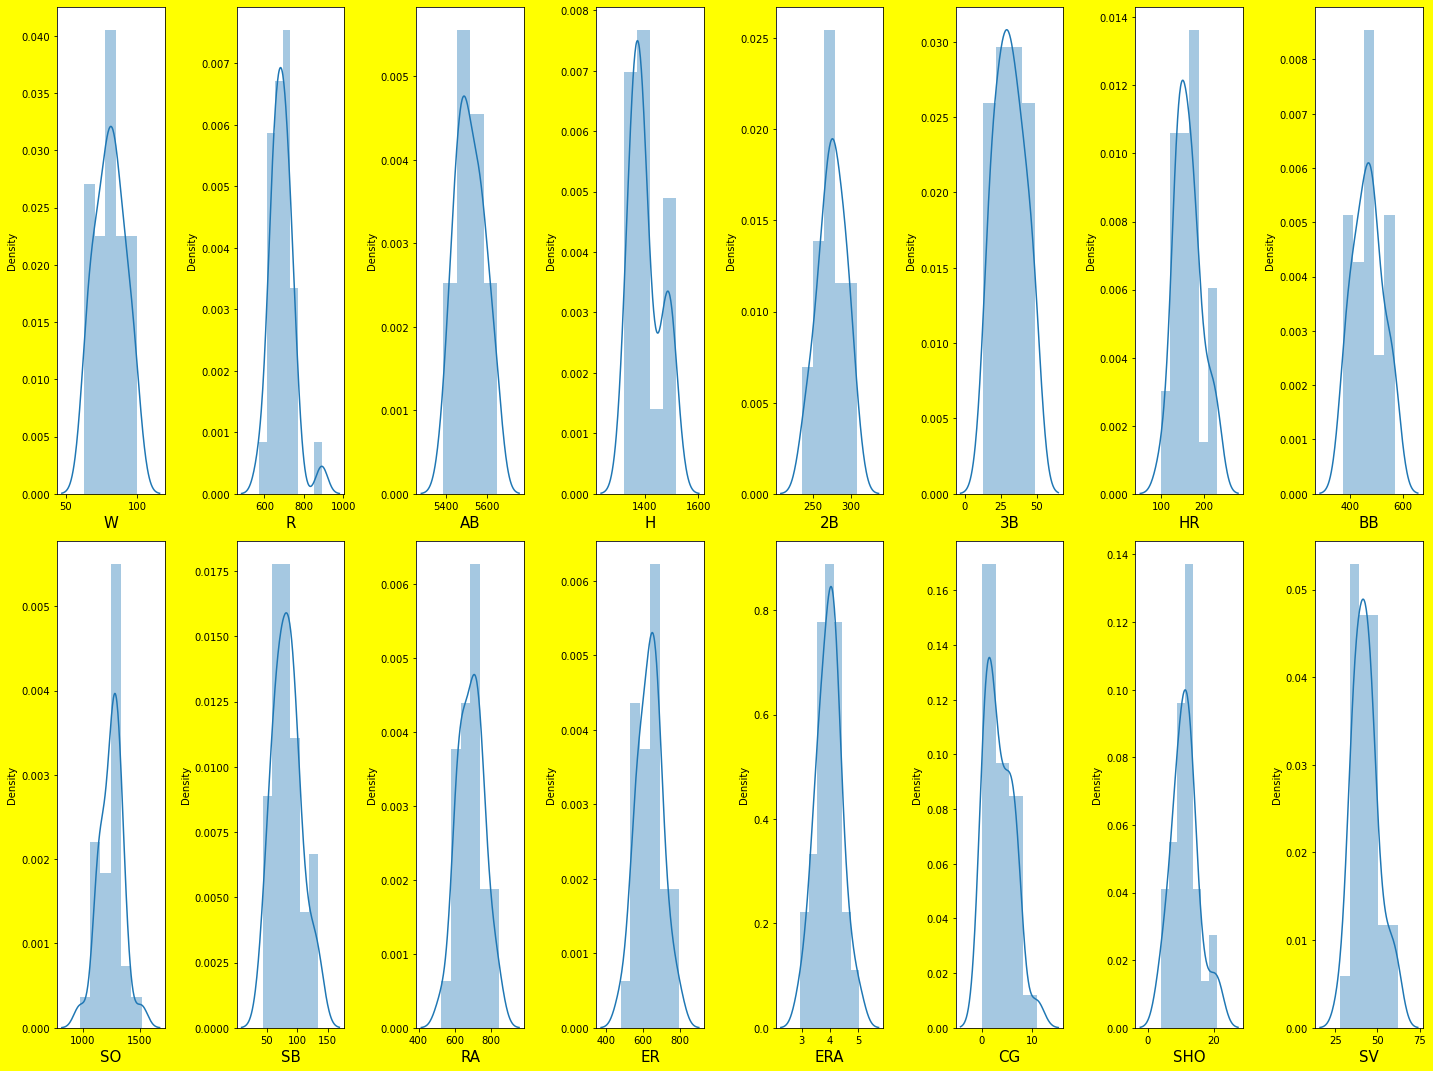

In [8]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(2,8,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    
    plotnumber+=1
plt.tight_layout()

In [9]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

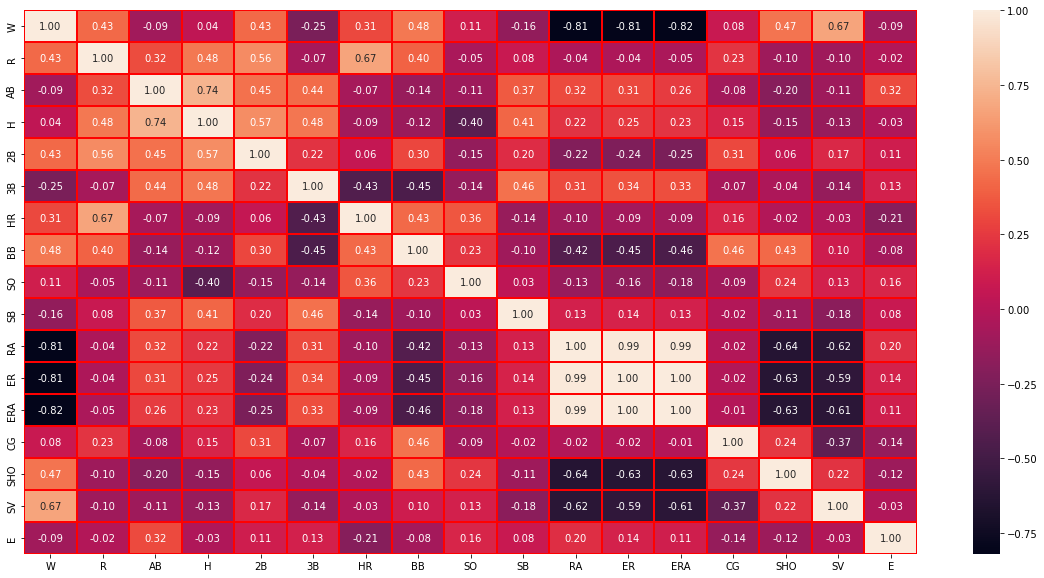

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")

<AxesSubplot:>

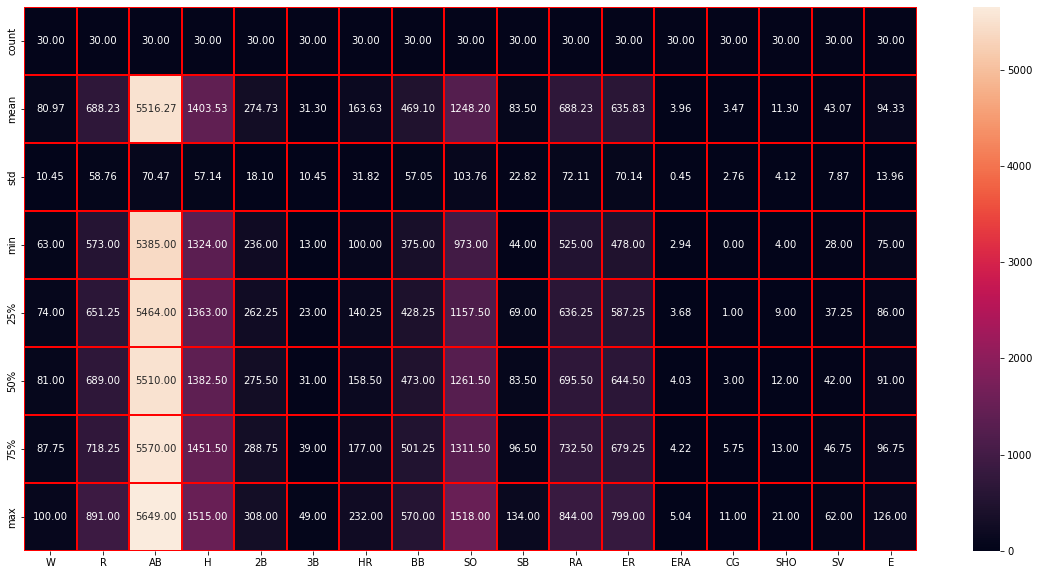

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(), annot=True, linewidths = 0.1, linecolor = "red", fmt = "0.2f")

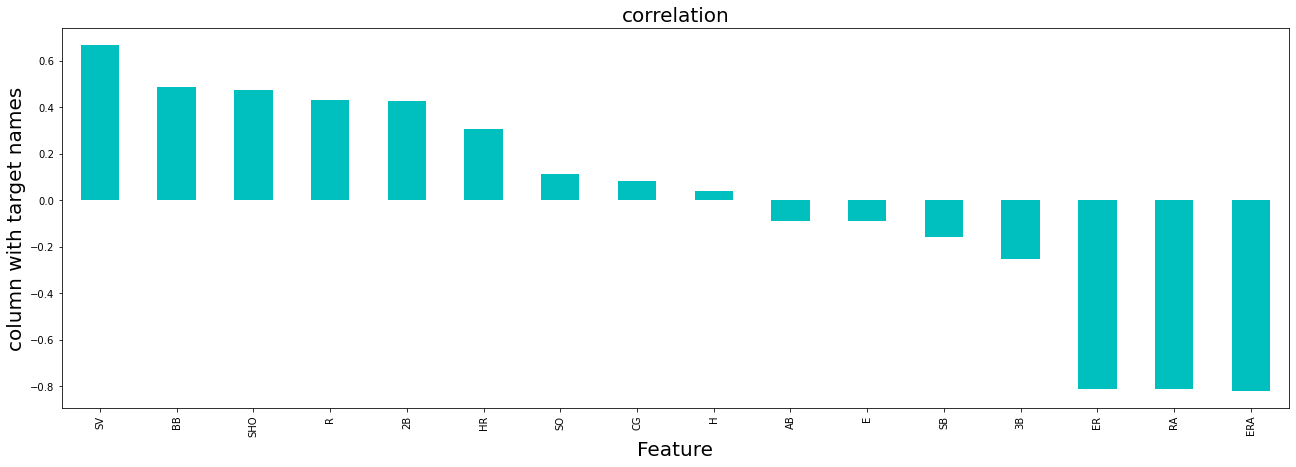

In [12]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color = 'c')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('column with target names', fontsize = 20)
plt.title('correlation', fontsize = 20)
plt.show()

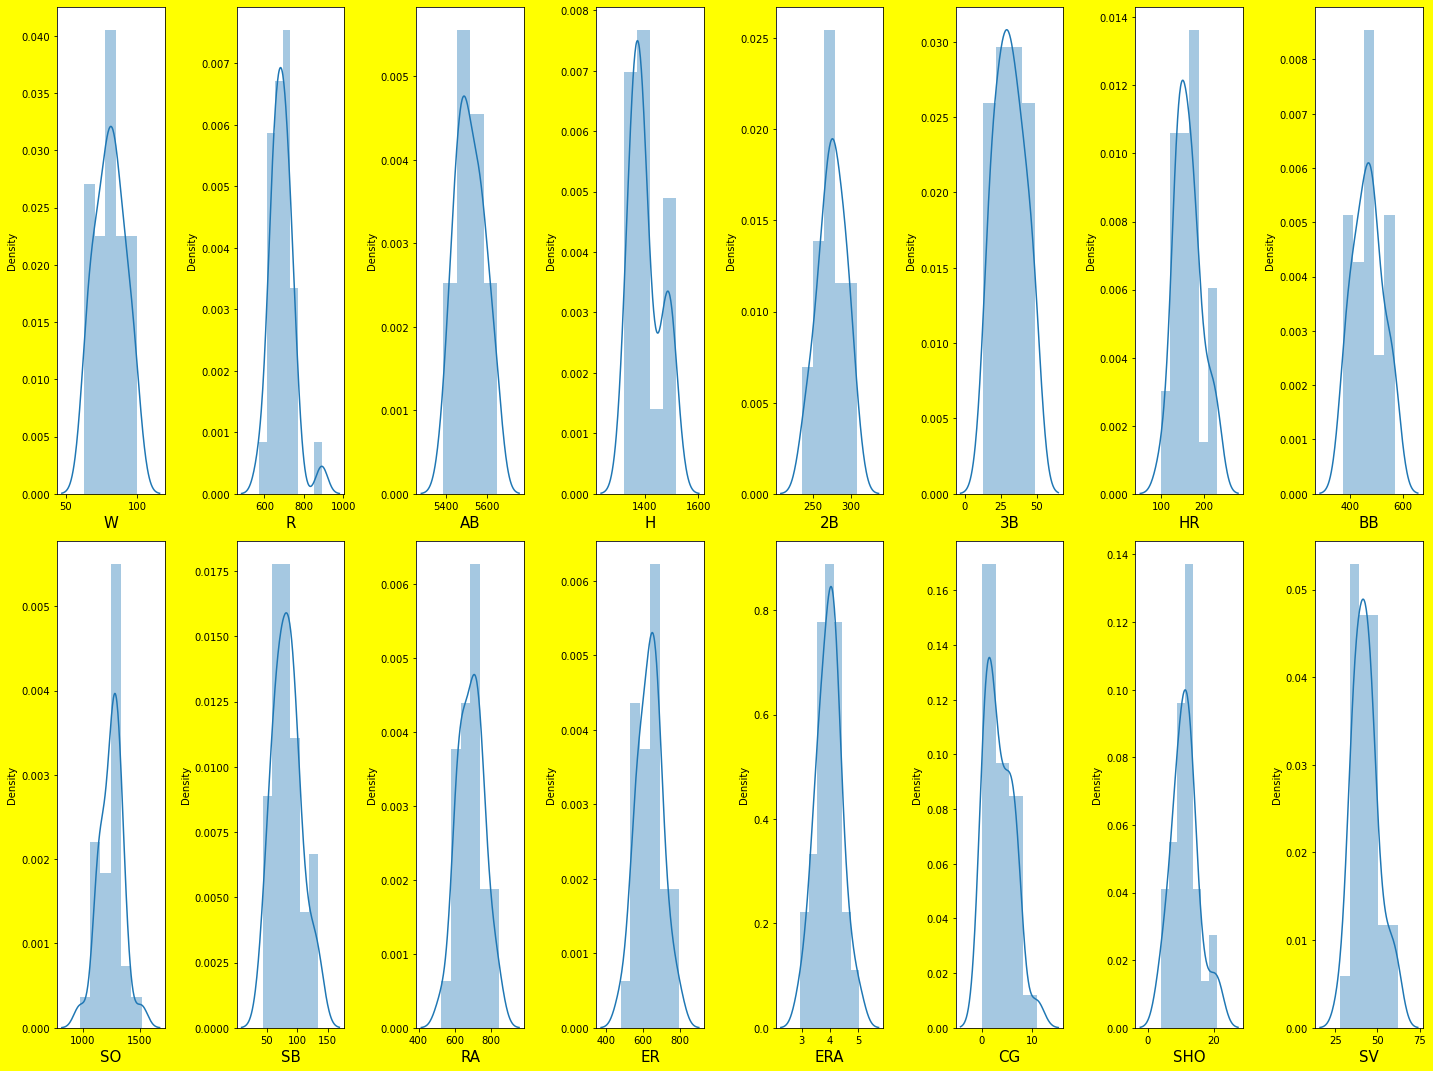

In [13]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=16:
        ax = plt.subplot(2,8,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    
    plotnumber+=1
plt.tight_layout()

In [14]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [15]:
x=df.drop("W",axis=1)
y = df['W']

In [16]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [17]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [18]:
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [19]:
x.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [20]:
x_scaler = power_transform(x)

In [21]:
x_scaler

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

In [22]:
type(x_scaler)

numpy.ndarray

In [23]:
pd.DataFrame(x_scaler, columns = x.columns).skew().sort_values(ascending=False)

E      0.063909
SO     0.041170
SHO    0.006560
ERA    0.001746
SV     0.000836
R      0.000000
AB     0.000000
H      0.000000
HR    -0.000065
ER    -0.001940
BB    -0.007760
RA    -0.008082
SB    -0.010455
2B    -0.035315
CG    -0.059785
3B    -0.072933
dtype: float64

In [24]:
x=pd.DataFrame(x_scaler, columns=x.columns)

In [25]:
sk = x.skew()

In [26]:
sk

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

In [27]:
np.abs(3)

3

In [28]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [29]:
x.skew()[np.abs(x.skew())>0.020].all()

True

In [30]:
x.skew()[np.abs(x.skew())<0.000].all()

True

<function matplotlib.pyplot.show(close=None, block=None)>

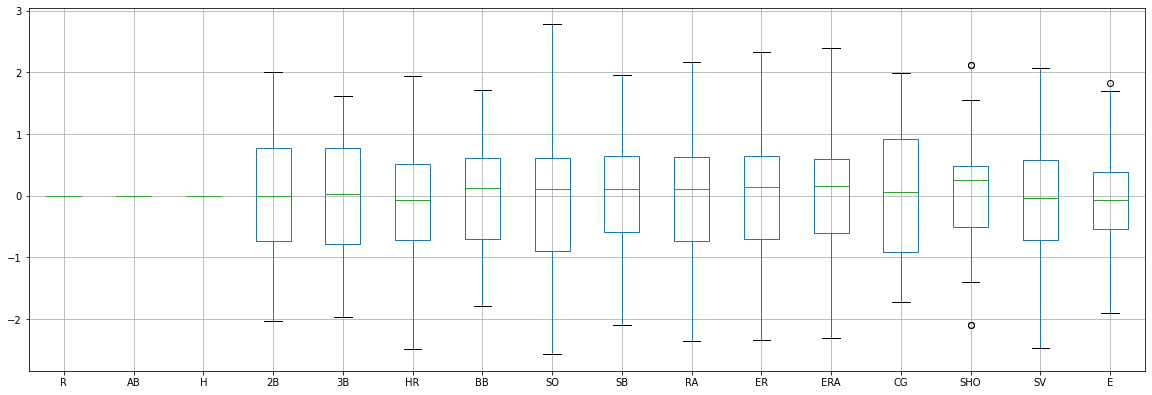

In [31]:
x.iloc[:,0:16].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show

In [32]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

R      False
AB     False
H      False
2B      True
3B      True
HR      True
BB      True
SO      True
SB      True
RA      True
ER      True
ERA     True
CG      True
SHO     True
SV      True
E       True
dtype: bool

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5]), array([1]))

In [34]:
df1=df[(z<3).all(axis=1)]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [35]:
df1.shape

(29, 17)

In [36]:
(np.abs(zscore(df1))<3).all().all()

True

In [37]:
Data_loss=((30-29)/30)*100

In [38]:
Data_loss

3.3333333333333335

In [39]:
x=df1.drop("W",axis=1)
y = df1['W']

In [40]:
x=sc.fit_transform(x)

In [41]:
x

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [42]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
lr

LinearRegression()

In [44]:
for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
        lr.fit(train_x,train_y)
        lrpred=lr.predict(test_x)
        print(f"at random_state{i},the training accuracy score is := {r2_score(test_y,lrpred)}")
        print(f"at random_state{i},the testing accuracy is: =        {lr.score(train_x,train_y)}")

at random_state0,the training accuracy score is := 0.37642412024128213
at random_state0,the testing accuracy is: =        0.979301718690075
at random_state1,the training accuracy score is := 0.755524141490963
at random_state1,the testing accuracy is: =        0.96935160044487
at random_state2,the training accuracy score is := -0.329290924990409
at random_state2,the testing accuracy is: =        0.966488123221676
at random_state3,the training accuracy score is := 0.8485894004113628
at random_state3,the testing accuracy is: =        0.9534657143080715
at random_state4,the training accuracy score is := 0.751477506964264
at random_state4,the testing accuracy is: =        0.9611298547801513
at random_state5,the training accuracy score is := 0.5545096693427438
at random_state5,the testing accuracy is: =        0.9617989022273269
at random_state6,the training accuracy score is := 0.7473255183245258
at random_state6,the testing accuracy is: =        0.960321770783518
at random_state7,the train

In [45]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {27}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {27}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 27, the training accuracy is:- 0.9611734965562408
At random state 27, the testing accuracy is:- 0.845846453284381




In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=(j))
    mean_score=cv_score.mean()
    print("at cv(j),mean_accuracy_score is:= {cv_score.mean()}")

at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}
at cv(j),mean_accuracy_score is:= {cv_score.mean()}


In [47]:
cv_score=cross_val_score(lr,x,y,cv=5)
mean_score=cv_score.mean()

In [48]:
mean_score

0.037628660496319834

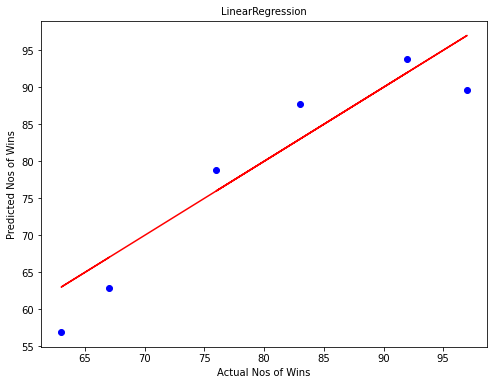

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Nos of Wins',fontsize=10)
plt.ylabel('Predicted Nos of Wins',fontsize=10)
plt.title('LinearRegression',fontsize=10)
plt.show()

In [50]:
parameters = {'alpha':[.0001, .001, .01, 1,10],'random_state':list(range(0,10))}
ls = Lasso() 
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [51]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [52]:
print(ls.score(x_train,y_train))
print(r2_score(test_y,lrpred))

0.8536948537194158
0.845846453284381


In [53]:
rd=Ridge()
Alpha_value={'alpha':[.0001,.001,.01,.1,1,10]}
grid=GridSearchCV(rd,Alpha_value)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})
{'alpha': 10}


In [54]:
rd=Ridge(alpha=10)
rd.fit(train_x,train_y)
rd.score(train_x,train_y)
rdpred=rd.predict(test_x)

In [55]:
print(rd.score(train_x,train_y))
print(r2_score(test_y,rdpred))

0.8697233933819585
0.8546793269741783


In [56]:
rfparam={'criterion':['mae','mse'],'max_features':["log2","auto","sqrt"]}
grid=GridSearchCV(rf,rfparam)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_params_)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae', 'mse'],
                         'max_features': ['log2', 'auto', 'sqrt']})
{'criterion': 'mse', 'max_features': 'auto'}


In [57]:
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)

In [58]:
print(r2_score(test_y,rfpred))

0.6723755280407868


In [59]:
cv_score=cross_val_score(rf,x,y,cv=4)

In [60]:
print(cv_score.mean())

0.5052360611749032


Following models are used to find the best model:-
Liner Regression
Lasso
Ridge
RandomForestRegressor

From above mentioned models 
Ridge model is best with Model training accuracy=86.97% & Testing Accuracy=85.46%.

In [61]:
pickle.dump(rd, open('Baseball_model.pkl', 'wb'))

In [62]:
pickled_model = pickle.load(open('Baseball_model.pkl', 'rb'))

In [63]:
pickled_model.predict(x_test)

array([70.7184923 , 65.24477542, 87.4502872 , 77.47720393, 85.68533261,
       88.31754198])